In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_excel('/content/AirQualityUCI.xlsx')

In [51]:
print(df.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [ ]:
print(df.describe())

                                Date       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count                           9357  9357.000000  9357.000000  9357.000000   
mean   2004-09-21 04:30:05.193972480   -34.207524  1048.869652  -159.090093   
min              2004-03-10 00:00:00  -200.000000  -200.000000  -200.000000   
25%              2004-06-16 00:00:00     0.600000   921.000000  -200.000000   
50%              2004-09-21 00:00:00     1.500000  1052.500000  -200.000000   
75%              2004-12-28 00:00:00     2.600000  1221.250000  -200.000000   
max              2005-04-04 00:00:00    11.900000  2039.750000  1189.000000   
std                              NaN    77.657170   329.817015   139.789093   

          C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  \
count  9357.000000    9357.000000  9357.000000   9357.000000  9357.000000   
mean      1.865576     894.475963   168.604200    794.872333    58.135898   
min    -200.000000    -200.000000  -200.000000   -200.000

In [54]:
# 1. Data Preprocessing
print("\nMissing values before handling:")
print(df.isnull().sum())


Missing values before handling:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [55]:
# Fill missing values for numerical columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

In [57]:
# Fill missing values for categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [61]:
# Convert necessary columns
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes

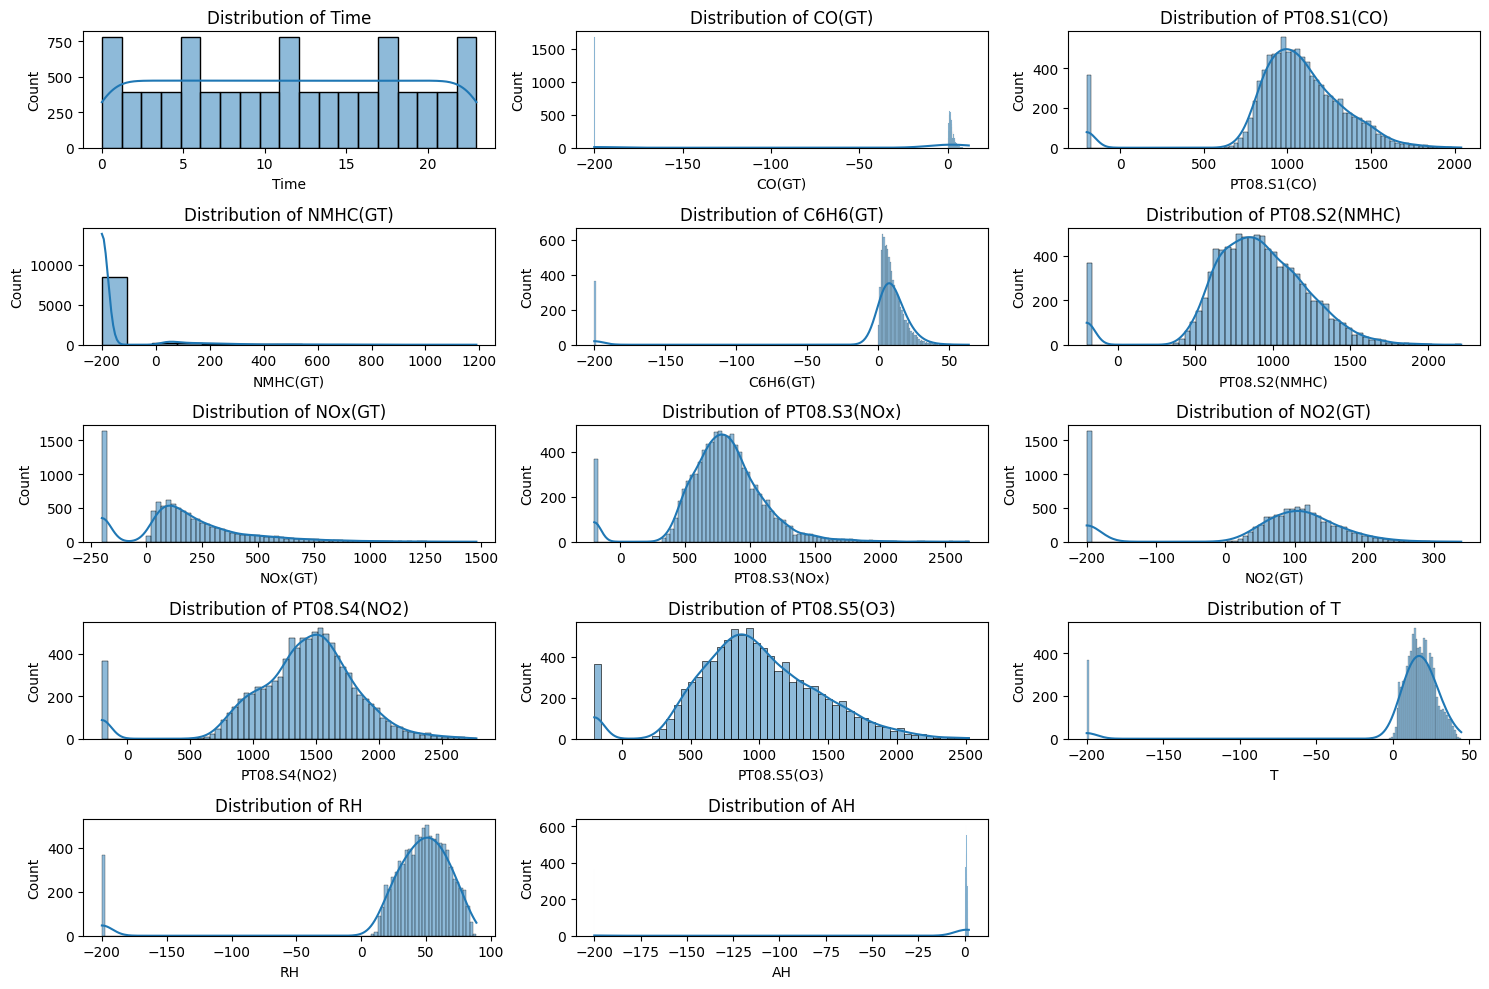

In [63]:
# 2. Exploratory Data Analysis (EDA)
# Plot distributions of numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns)//3 + 1, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

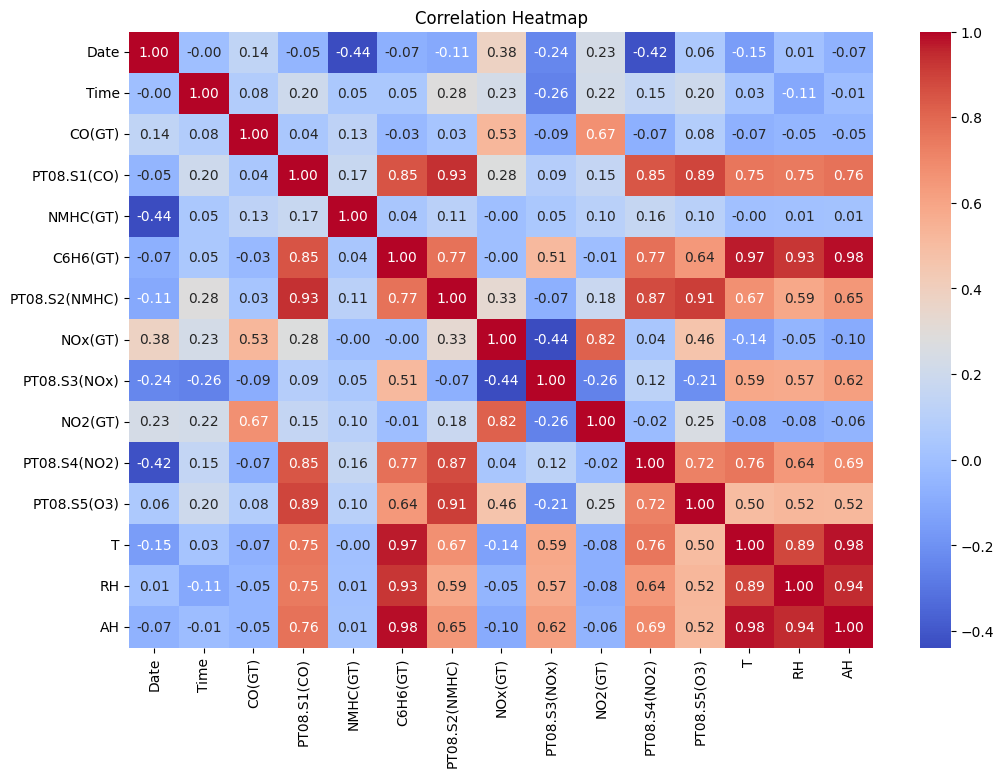

In [64]:
# Compute the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

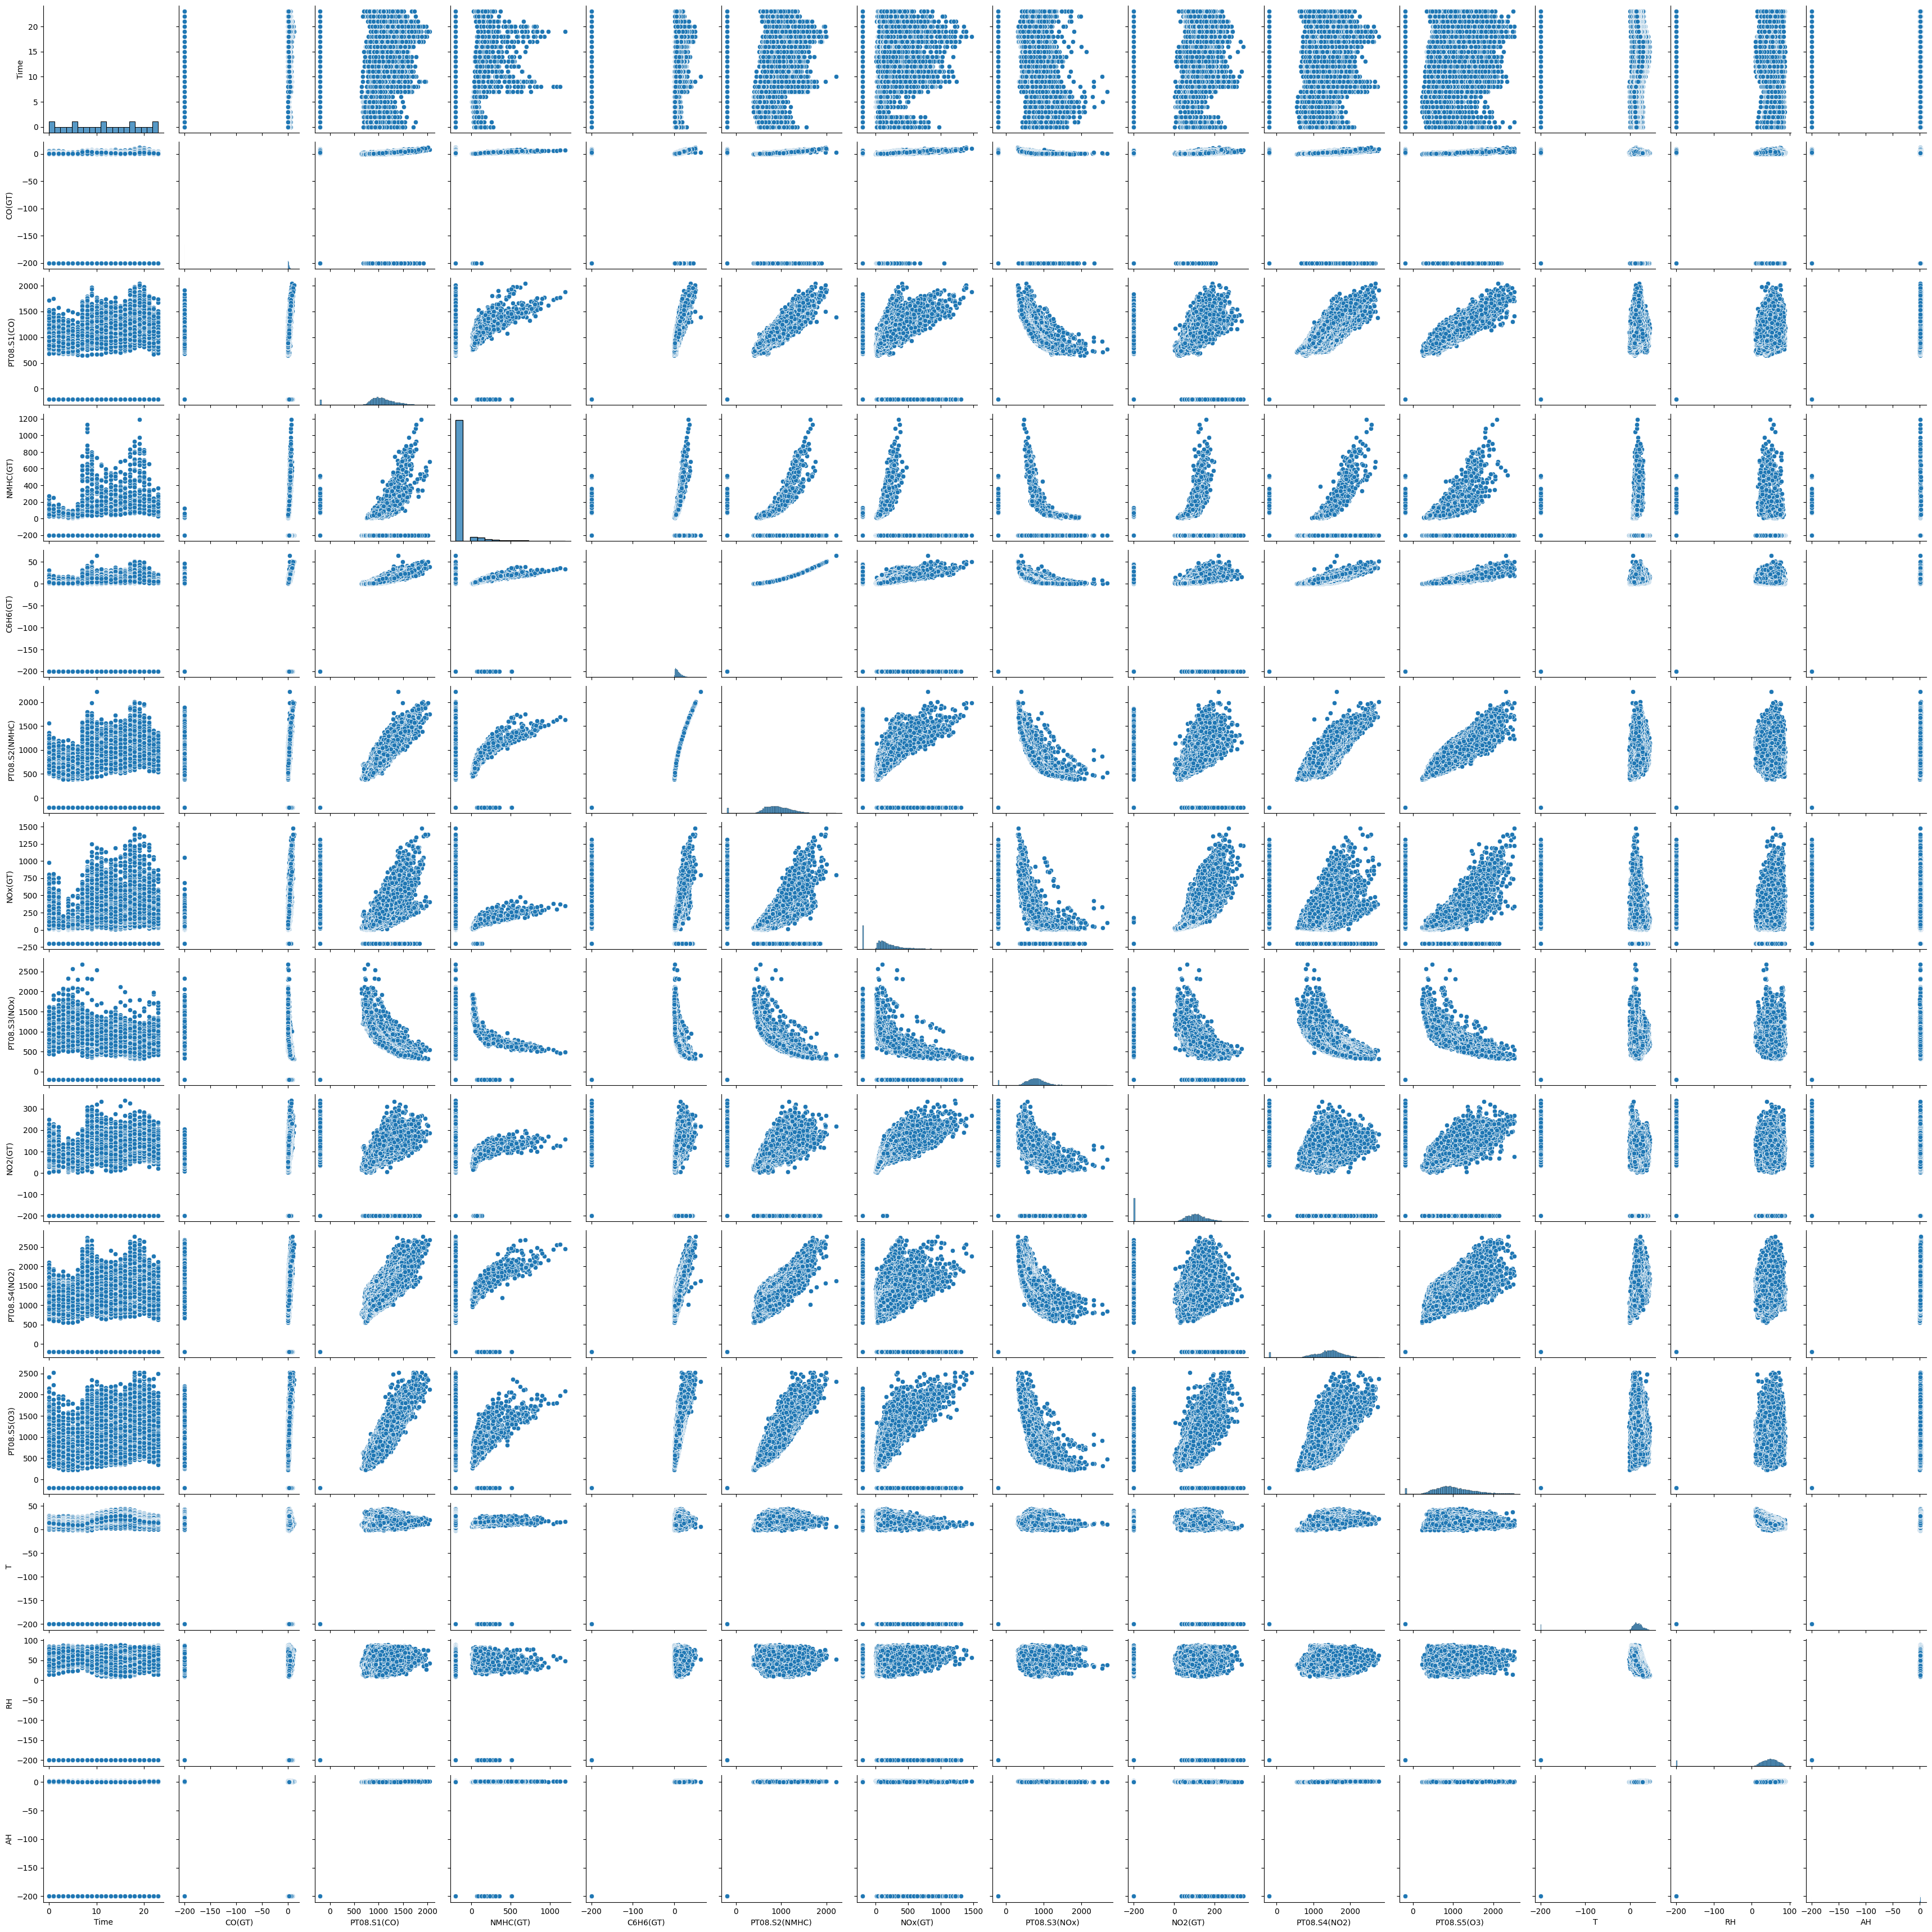

In [65]:
# Exclude non-numeric columns for pairplot
if len(numerical_columns) > 0:
    sns.pairplot(df[numerical_columns])
    plt.show()

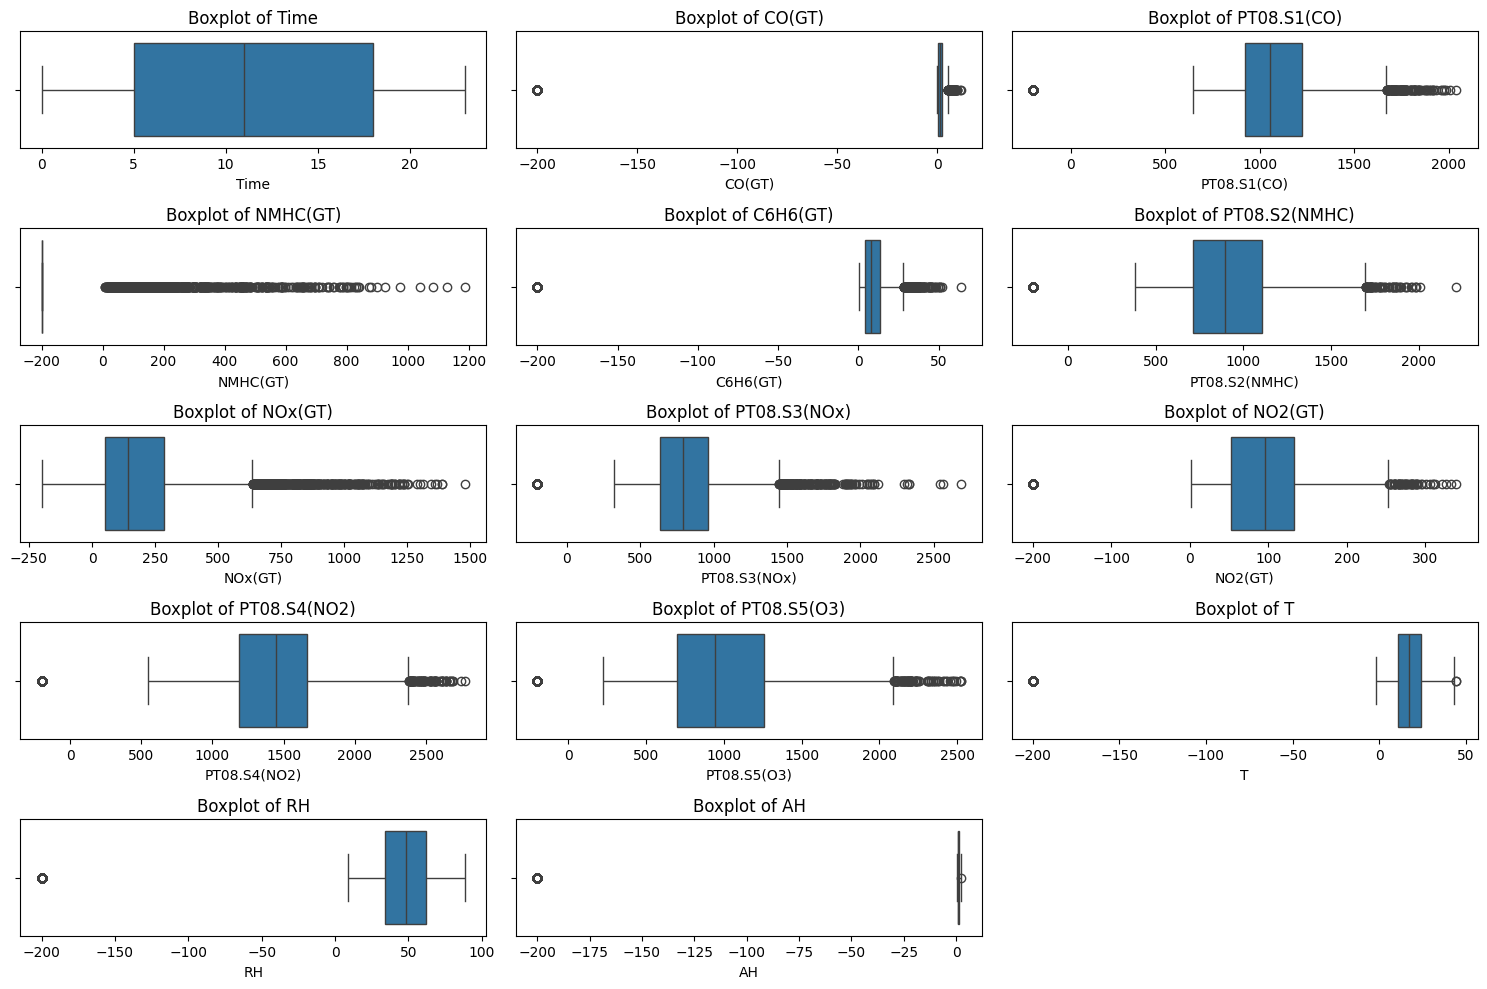

In [66]:
## Boxplot to identify outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns)//3 + 1, 3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()